In [1]:
import os 
import numpy as np

labels_dict = {"hands_down": 0,
               "stop": 1,
               "hands_up": 2,
               "hands_up_small": 3,
               "hands_down_small": 4,
               "hads_down_up": 5,
               "hands_to_sides": 6}

data_list = []
labels_list = []

normalized_data_dir = "database/static_gestures_with_pose_rescaling"

for folder in os.listdir(normalized_data_dir):
    print(folder)
    src_path = os.path.join(normalized_data_dir, folder)
    for data_file_name in os.listdir(src_path):
        full_data_file_path = os.path.join(src_path, data_file_name)
        features = np.load(full_data_file_path)
        if not any(np.isnan(features)):
            data_list.append(features)
            labels_list.append(labels_dict[folder])

print("Loaded")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_list, labels_list, stratify=labels_list,
                                                    test_size=0.3, random_state=42)


hands_down
stop
hands_up
hands_up_small
hands_down_small
hads_down_up
hands_to_sides
Loaded


In [2]:
def vectorize_data(data):
    vect_data = np.zeros((28, 200))
    for i in range(len(data)):
        val = int(round(data[i])) + 100
        vect_data[i][val] = 1
    return vect_data

In [3]:
vx_train = np.array([vectorize_data(d) for d in X_train])
vx_test = np.array([vectorize_data(d) for d in X_test])

In [4]:
vx_train = [x.tolist() for x in X_train]

In [5]:
from keras.utils.vis_utils import plot_model
def plot_m(model):
    model.summary()

Using TensorFlow backend.


In [7]:
from keras.layers import *
from keras.models import Sequential

model1 = Sequential()
model1.add(Dense(28, activation="sigmoid", input_shape=(28,)))
model1.add(Dense(7, activation="softmax"))
model1.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])
plot_m(model1)
train_hist1 = model1.fit(np.array(X_train), np.array(y_train),
                       epochs=50, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 51), train_hist1.history["acc"])
plt.plot(range(1, 51), train_hist1.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28)                812       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 203       
Total params: 1,015
Trainable params: 1,015
Non-trainable params: 0
_________________________________________________________________
Train on 7350 samples, validate on 3150 samples
Epoch 1/50
7350/7350 [==============================] - 2s 295us/step - loss: 0.9153 - acc: 0.8031 - val_loss: 0.4377 - val_acc: 0.9165
Epoch 2/50
7350/7350 [==============================] - 1s 81us/step - loss: 0.3109 - acc: 0.9367 - val_loss: 0.2314 - val_acc: 0.9425
Epoch 3/50
7350/7350 [==============================] - 1s 79us/step - loss: 0.1898 - acc: 0.9547 - val_loss: 0.1678 - val_acc: 0.9521
Epoch 4/50
7350/7350 [==============================] - 1s 8

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 28)                812       
_________________________________________________________________
dense_4 (Dense)              (None, 28)                812       
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 203       
Total params: 1,827
Trainable params: 1,827
Non-trainable params: 0
_________________________________________________________________
Train on 7350 samples, validate on 3150 samples
Epoch 1/50
7350/7350 [==============================] - 1s 96us/step - loss: 1.3157 - acc: 0.6429 - val_loss: 0.7257 - val_acc: 0.8352
Epoch 2/50
7350/7350 [==============================] - 1s 90us/step - loss: 0.4650 - acc: 0.8935 - val_loss: 0.2987 - val_acc: 0.9502
Epoch 3/50
7350/7350 [==============================] - 1s 86us/

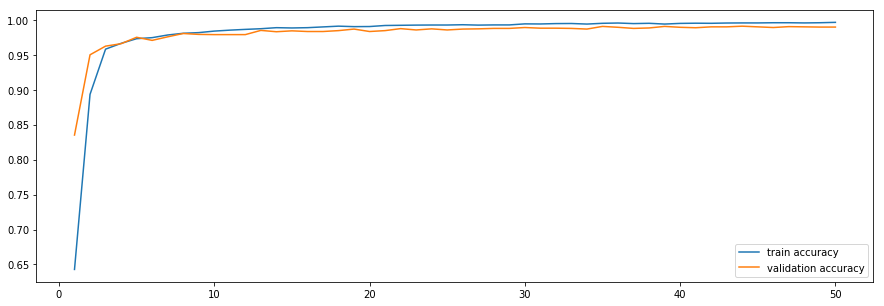

In [8]:
from keras.layers import *
from keras.models import Sequential

model2 = Sequential()
model2.add(Dense(28, activation="sigmoid", input_shape=(28,)))

model2.add(Dense(28, activation="sigmoid"))

model2.add(Dense(7, activation="softmax"))
model2.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])
plot_m(model2)#, "model2.png")
train_hist2 = model2.fit(np.array(X_train), np.array(y_train),
                       epochs=50, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 51), train_hist2.history["acc"])
plt.plot(range(1, 51), train_hist2.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 28)                812       
_________________________________________________________________
dense_7 (Dense)              (None, 28)                812       
_________________________________________________________________
dense_8 (Dense)              (None, 28)                812       
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 203       
Total params: 2,639
Trainable params: 2,639
Non-trainable params: 0
_________________________________________________________________
Train on 7350 samples, validate on 3150 samples
Epoch 1/50
7350/7350 [==============================] - 1s 100us/step - loss: 1.4288 - acc: 0.6290 - val_loss: 0.7633 - val_acc: 0.8949
Epoch 2/50
7350/7350 [==============================] - 1s 91us/st

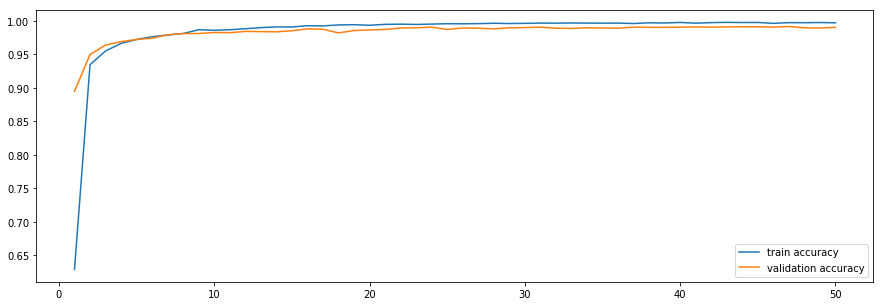

In [9]:
from keras.layers import *
from keras.models import Sequential

model3 = Sequential()
model3.add(Dense(28, activation="sigmoid", input_shape=(28,)))

model3.add(Dense(28, activation="sigmoid"))
model3.add(Dense(28, activation="sigmoid"))


model3.add(Dense(7, activation="softmax"))
model3.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])
plot_m(model3)

train_hist3 = model3.fit(np.array(X_train), np.array(y_train),
                       epochs=50, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 51), train_hist3.history["acc"])
plt.plot(range(1, 51), train_hist3.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_11 (Dense)             (None, 56)                1624      
_________________________________________________________________
dense_12 (Dense)             (None, 56)                3192      
_________________________________________________________________
dense_13 (Dense)             (None, 7)                 399       
Total params: 6,027
Trainable params: 6,027
Non-trainable params: 0
_________________________________________________________________
Train on 7350 samples, validate on 3150 samples
Epoch 1/50
7350/7350 [==============================] - 1s 101us/step - loss: 1.0980 - acc: 0.6778 - val_loss: 0.4451 - val_acc: 0.9327
Epoch 2/50
7350/7350 [==============================] - 1s 88us/st

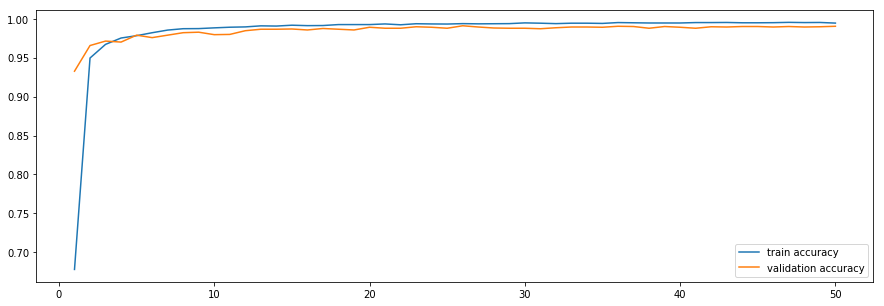

In [10]:
from keras.layers import *
from keras.models import Sequential

model4 = Sequential()
model4.add(Dense(28, activation="sigmoid", input_shape=(28,)))

model4.add(Dense(56, activation="sigmoid"))
model4.add(Dense(56, activation="sigmoid"))


model4.add(Dense(7, activation="softmax"))
model4.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

plot_m(model4)

train_hist4 = model4.fit(np.array(X_train), np.array(y_train),
                       epochs=50, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 51), train_hist4.history["acc"])
plt.plot(range(1, 51), train_hist4.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_15 (Dense)             (None, 56)                1624      
_________________________________________________________________
dense_16 (Dense)             (None, 28)                1596      
_________________________________________________________________
dense_17 (Dense)             (None, 7)                 203       
Total params: 4,235
Trainable params: 4,235
Non-trainable params: 0
_________________________________________________________________
Train on 7350 samples, validate on 3150 samples
Epoch 1/50
7350/7350 [==============================] - 1s 99us/step - loss: 1.2707 - acc: 0.6405 - val_loss: 0.6451 - val_acc: 0.8108
Epoch 2/50
7350/7350 [==============================] - 1s 88us/ste

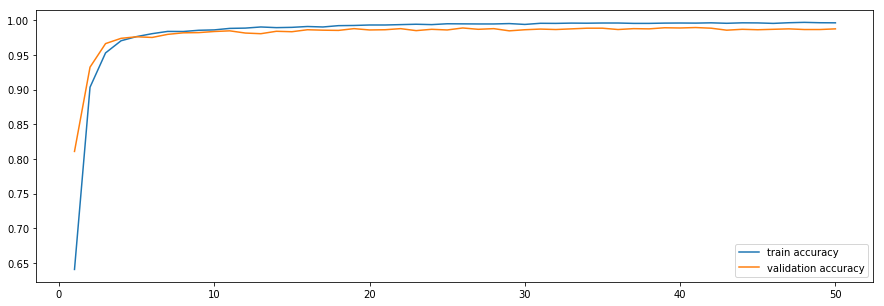

In [11]:
from keras.layers import *
from keras.models import Sequential

model5 = Sequential()
model5.add(Dense(28, activation="sigmoid", input_shape=(28,)))

model5.add(Dense(56, activation="sigmoid"))
model5.add(Dense(28, activation="sigmoid"))


model5.add(Dense(7, activation="softmax"))
model5.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

plot_m(model5)

train_hist5 = model5.fit(np.array(X_train), np.array(y_train),
                       epochs=50, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 51), train_hist5.history["acc"])
plt.plot(range(1, 51), train_hist5.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_19 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_20 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_21 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_22 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_23 (Dense)             (None, 7)                 203       
Total params: 4,263
Trainable params: 4,263
Non-trainable params: 0
____________________________________________________

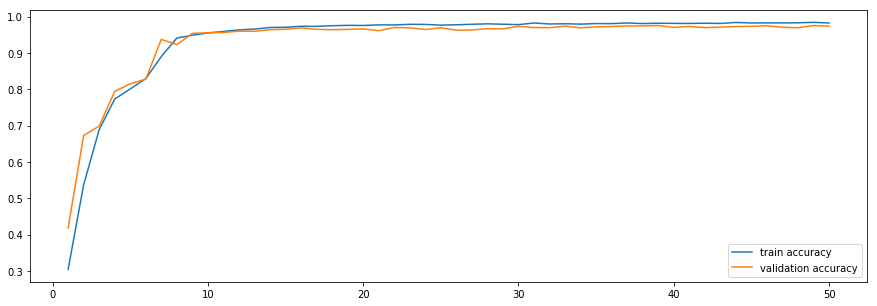

In [12]:
from keras.layers import *
from keras.models import Sequential

model6 = Sequential()
model6.add(Dense(28, activation="sigmoid", input_shape=(28,)))

model6.add(Dense(28, activation="sigmoid"))
model6.add(Dense(28, activation="sigmoid"))
model6.add(Dense(28, activation="sigmoid"))
model6.add(Dense(28, activation="sigmoid"))


model6.add(Dense(7, activation="softmax"))
model6.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

plot_m(model6)

train_hist6 = model6.fit(np.array(X_train), np.array(y_train),
                       epochs=50, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 51), train_hist6.history["acc"])
plt.plot(range(1, 51), train_hist6.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_25 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_26 (Dense)             (None, 56)                1624      
_________________________________________________________________
dense_27 (Dense)             (None, 56)                3192      
_________________________________________________________________
dense_28 (Dense)             (None, 28)                1596      
_________________________________________________________________
dense_29 (Dense)             (None, 7)                 203       
Total params: 8,239
Trainable params: 8,239
Non-trainable params: 0
____________________________________________________

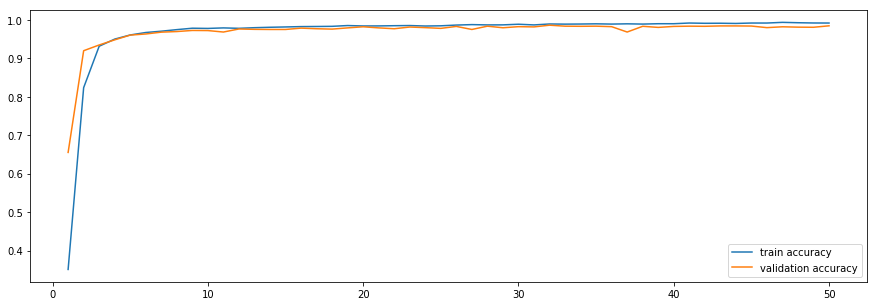

In [13]:
from keras.layers import *
from keras.models import Sequential

model7 = Sequential()
model7.add(Dense(28, activation="sigmoid", input_shape=(28,)))

model7.add(Dense(28, activation="sigmoid"))
model7.add(Dense(56, activation="sigmoid"))
model7.add(Dense(56, activation="sigmoid"))
model7.add(Dense(28, activation="sigmoid"))


model7.add(Dense(7, activation="softmax"))
model7.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])


plot_m(model7)

train_hist7 = model7.fit(np.array(X_train), np.array(y_train),
                       epochs=50, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 51), train_hist7.history["acc"])
plt.plot(range(1, 51), train_hist7.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_31 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_32 (Dense)             (None, 56)                1624      
_________________________________________________________________
dense_33 (Dense)             (None, 56)                3192      
_________________________________________________________________
dense_34 (Dense)             (None, 112)               6384      
_________________________________________________________________
dense_35 (Dense)             (None, 7)                 791       
Total params: 13,615
Trainable params: 13,615
Non-trainable params: 0
__________________________________________________

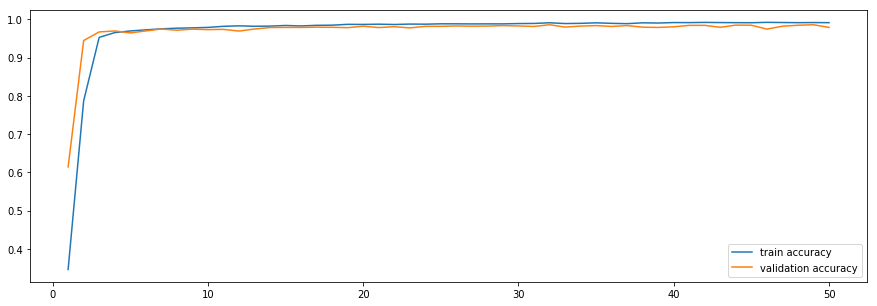

In [14]:
from keras.layers import *
from keras.models import Sequential

model8 = Sequential()
model8.add(Dense(28, activation="sigmoid", input_shape=(28,)))

model8.add(Dense(28, activation="sigmoid"))
model8.add(Dense(56, activation="sigmoid"))
model8.add(Dense(56, activation="sigmoid"))
model8.add(Dense(112, activation="sigmoid"))


model8.add(Dense(7, activation="softmax"))
model8.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])


plot_m(model8)

train_hist8 = model8.fit(np.array(X_train), np.array(y_train),
                       epochs=50, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 51), train_hist8.history["acc"])
plt.plot(range(1, 51), train_hist8.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

In [15]:
models_list = [model1, model2, model3, model4, model5, model6, model7, model8]
train_hists = [train_hist1, train_hist2, train_hist3, train_hist4, train_hist5, train_hist6, train_hist7, train_hist8]

In [16]:
def get_max_val_acc_epoch(train_hist):
    return np.argmax(train_hist.history["val_acc"])

def get_max_val_acc(train_hist):
    return np.max(train_hist.history["val_acc"])


In [17]:
best_accs_epochs = [get_max_val_acc_epoch(tr_h) for tr_h in train_hists]

In [18]:
best_accs = [get_max_val_acc(tr_h) for tr_h in train_hists]

In [19]:
best_accs_epochs

[45, 43, 46, 25, 40, 38, 31, 31]

In [20]:
best_accs

[0.9895238280296326,
 0.9911110997200012,
 0.9917460083961487,
 0.9911110997200012,
 0.9895238280296326,
 0.9758729934692383,
 0.9863492250442505,
 0.9857142567634583]

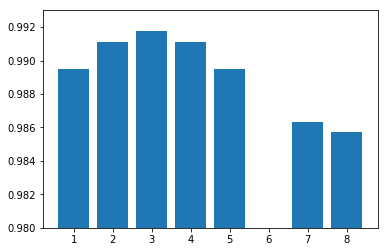

In [21]:
plt.bar(range(1, 1+len(best_accs)), best_accs)
plt.ylim(0.98, 0.993)
plt.show()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_37 (Dense)             (None, 7)                 203       
Total params: 1,015
Trainable params: 1,015
Non-trainable params: 0
_________________________________________________________________
Train on 7350 samples, validate on 3150 samples
Epoch 1/50
7350/7350 [==============================] - 1s 99us/step - loss: 0.8057 - acc: 0.7437 - val_loss: 0.4552 - val_acc: 0.8498
Epoch 2/50
7350/7350 [==============================] - 1s 84us/step - loss: 0.3671 - acc: 0.8838 - val_loss: 0.2965 - val_acc: 0.9165
Epoch 3/50
7350/7350 [==============================] - 1s 84us/step - loss: 0.2522 - acc: 0.9220 - val_loss: 0.2194 - val_acc: 0.9349
Epoch 4/50
7350/7350 [==============================] - 1s 88

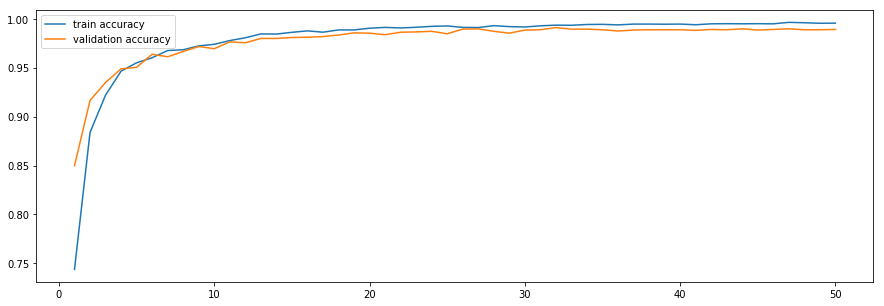

In [22]:
from keras.layers import *
from keras.models import Sequential

model_tan1 = Sequential()
model_tan1.add(Dense(28, activation="tanh", input_shape=(28,)))
model_tan1.add(Dense(7, activation="softmax"))
model_tan1.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])
plot_m(model_tan1)
train_hist1_tanh = model_tan1.fit(np.array(X_train), np.array(y_train),
                       epochs=50, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 51), train_hist1_tanh.history["acc"])
plt.plot(range(1, 51), train_hist1_tanh.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_39 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_40 (Dense)             (None, 7)                 203       
Total params: 1,827
Trainable params: 1,827
Non-trainable params: 0
_________________________________________________________________
Train on 7350 samples, validate on 3150 samples
Epoch 1/50
7350/7350 [==============================] - 1s 94us/step - loss: 0.4610 - acc: 0.8829 - val_loss: 0.1785 - val_acc: 0.9486
Epoch 2/50
7350/7350 [==============================] - 1s 86us/step - loss: 0.1319 - acc: 0.9631 - val_loss: 0.1099 - val_acc: 0.9683
Epoch 3/50
7350/7350 [==============================] - 1s 86us

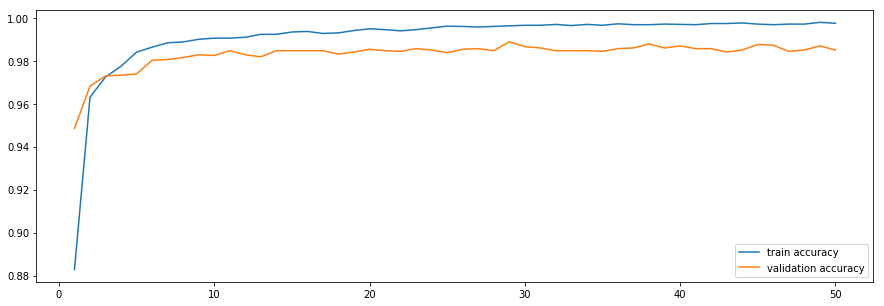

In [23]:
from keras.layers import *
from keras.models import Sequential

model_tan2 = Sequential()
model_tan2.add(Dense(28, activation="tanh", input_shape=(28,)))

model_tan2.add(Dense(28, activation="tanh"))

model_tan2.add(Dense(7, activation="softmax"))
model_tan2.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])
plot_m(model_tan2)#, "model_tan2.png")
train_hist2_tanh = model_tan2.fit(np.array(X_train), np.array(y_train),
                       epochs=50, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 51), train_hist2_tanh.history["acc"])
plt.plot(range(1, 51), train_hist2_tanh.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_42 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_43 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_44 (Dense)             (None, 7)                 203       
Total params: 2,639
Trainable params: 2,639
Non-trainable params: 0
_________________________________________________________________
Train on 7350 samples, validate on 3150 samples
Epoch 1/50
7350/7350 [==============================] - 1s 103us/step - loss: 0.3936 - acc: 0.8868 - val_loss: 0.1765 - val_acc: 0.9451
Epoch 2/50
7350/7350 [==============================] - 1s 92us/s

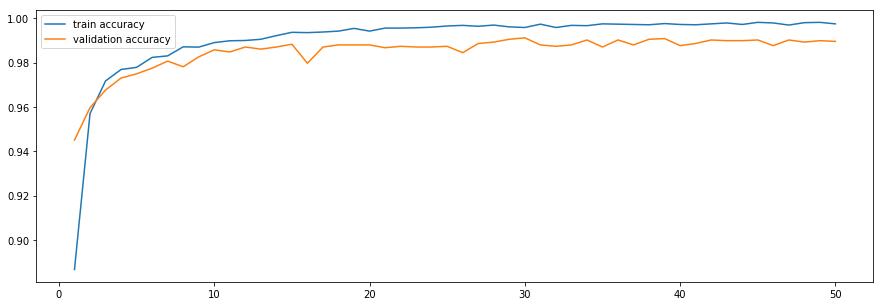

In [24]:
from keras.layers import *
from keras.models import Sequential

model_tan3 = Sequential()
model_tan3.add(Dense(28, activation="tanh", input_shape=(28,)))

model_tan3.add(Dense(28, activation="tanh"))
model_tan3.add(Dense(28, activation="tanh"))


model_tan3.add(Dense(7, activation="softmax"))
model_tan3.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])
plot_m(model_tan3)

train_hist3_tanh = model_tan3.fit(np.array(X_train), np.array(y_train),
                       epochs=50, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 51), train_hist3_tanh.history["acc"])
plt.plot(range(1, 51), train_hist3_tanh.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_46 (Dense)             (None, 56)                1624      
_________________________________________________________________
dense_47 (Dense)             (None, 56)                3192      
_________________________________________________________________
dense_48 (Dense)             (None, 7)                 399       
Total params: 6,027
Trainable params: 6,027
Non-trainable params: 0
_________________________________________________________________
Train on 7350 samples, validate on 3150 samples
Epoch 1/50
7350/7350 [==============================] - 1s 103us/step - loss: 0.3190 - acc: 0.9097 - val_loss: 0.1581 - val_acc: 0.9578
Epoch 2/50
7350/7350 [==============================] - 1s 94us/s

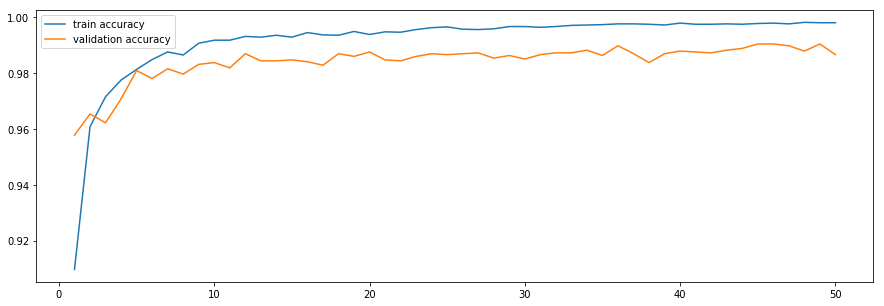

In [25]:
from keras.layers import *
from keras.models import Sequential

model_tan4 = Sequential()
model_tan4.add(Dense(28, activation="tanh", input_shape=(28,)))

model_tan4.add(Dense(56, activation="tanh"))
model_tan4.add(Dense(56, activation="tanh"))


model_tan4.add(Dense(7, activation="softmax"))
model_tan4.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

plot_m(model_tan4)

train_hist4_tanh = model_tan4.fit(np.array(X_train), np.array(y_train),
                       epochs=50, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 51), train_hist4_tanh.history["acc"])
plt.plot(range(1, 51), train_hist4_tanh.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_50 (Dense)             (None, 56)                1624      
_________________________________________________________________
dense_51 (Dense)             (None, 28)                1596      
_________________________________________________________________
dense_52 (Dense)             (None, 7)                 203       
Total params: 4,235
Trainable params: 4,235
Non-trainable params: 0
_________________________________________________________________
Train on 7350 samples, validate on 3150 samples
Epoch 1/50
7350/7350 [==============================] - 1s 102us/step - loss: 0.3996 - acc: 0.8878 - val_loss: 0.1778 - val_acc: 0.9451
Epoch 2/50
7350/7350 [==============================] - 1s 92us/s

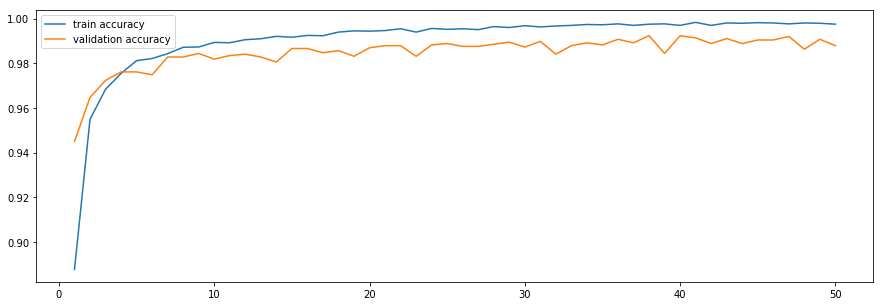

In [26]:
from keras.layers import *
from keras.models import Sequential

model_tan5 = Sequential()
model_tan5.add(Dense(28, activation="tanh", input_shape=(28,)))

model_tan5.add(Dense(56, activation="tanh"))
model_tan5.add(Dense(28, activation="tanh"))


model_tan5.add(Dense(7, activation="softmax"))
model_tan5.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

plot_m(model_tan5)

train_hist5_tanh = model_tan5.fit(np.array(X_train), np.array(y_train),
                       epochs=50, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 51), train_hist5_tanh.history["acc"])
plt.plot(range(1, 51), train_hist5_tanh.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_54 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_55 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_56 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_57 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_58 (Dense)             (None, 7)                 203       
Total params: 4,263
Trainable params: 4,263
Non-trainable params: 0
___________________________________________________

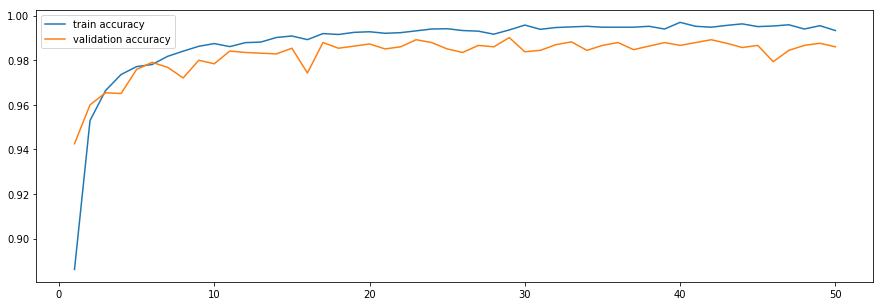

In [27]:
from keras.layers import *
from keras.models import Sequential

model_tan6 = Sequential()
model_tan6.add(Dense(28, activation="tanh", input_shape=(28,)))

model_tan6.add(Dense(28, activation="tanh"))
model_tan6.add(Dense(28, activation="tanh"))
model_tan6.add(Dense(28, activation="tanh"))
model_tan6.add(Dense(28, activation="tanh"))


model_tan6.add(Dense(7, activation="softmax"))
model_tan6.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

plot_m(model_tan6)

train_hist6_tanh = model_tan6.fit(np.array(X_train), np.array(y_train),
                       epochs=50, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 51), train_hist6_tanh.history["acc"])
plt.plot(range(1, 51), train_hist6_tanh.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_60 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_61 (Dense)             (None, 56)                1624      
_________________________________________________________________
dense_62 (Dense)             (None, 56)                3192      
_________________________________________________________________
dense_63 (Dense)             (None, 28)                1596      
_________________________________________________________________
dense_64 (Dense)             (None, 7)                 203       
Total params: 8,239
Trainable params: 8,239
Non-trainable params: 0
___________________________________________________

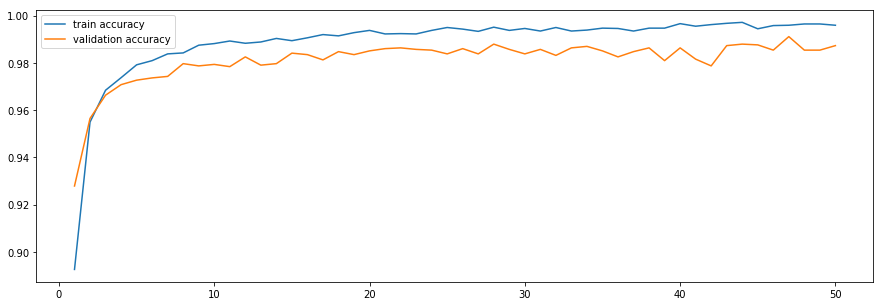

In [28]:
from keras.layers import *
from keras.models import Sequential

model_tan7 = Sequential()
model_tan7.add(Dense(28, activation="tanh", input_shape=(28,)))

model_tan7.add(Dense(28, activation="tanh"))
model_tan7.add(Dense(56, activation="tanh"))
model_tan7.add(Dense(56, activation="tanh"))
model_tan7.add(Dense(28, activation="tanh"))


model_tan7.add(Dense(7, activation="softmax"))
model_tan7.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])


plot_m(model_tan7)

train_hist7_tanh = model_tan7.fit(np.array(X_train), np.array(y_train),
                       epochs=50, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 51), train_hist7_tanh.history["acc"])
plt.plot(range(1, 51), train_hist7_tanh.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_66 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_67 (Dense)             (None, 56)                1624      
_________________________________________________________________
dense_68 (Dense)             (None, 56)                3192      
_________________________________________________________________
dense_69 (Dense)             (None, 112)               6384      
_________________________________________________________________
dense_70 (Dense)             (None, 7)                 791       
Total params: 13,615
Trainable params: 13,615
Non-trainable params: 0
_________________________________________________

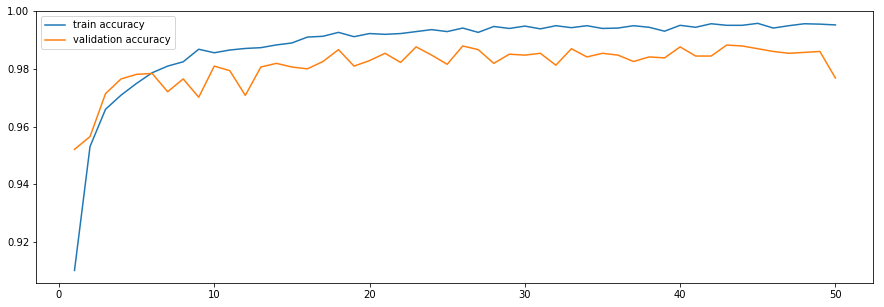

In [29]:
from keras.layers import *
from keras.models import Sequential

model_tan8 = Sequential()
model_tan8.add(Dense(28, activation="tanh", input_shape=(28,)))

model_tan8.add(Dense(28, activation="tanh"))
model_tan8.add(Dense(56, activation="tanh"))
model_tan8.add(Dense(56, activation="tanh"))
model_tan8.add(Dense(112, activation="tanh"))


model_tan8.add(Dense(7, activation="softmax"))
model_tan8.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])


plot_m(model_tan8)

train_hist8_tanh = model_tan8.fit(np.array(X_train), np.array(y_train),
                       epochs=50, batch_size=10,
                       validation_data=(np.array(X_test), np.array(y_test)), 
                       verbose=True)


from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(range(1, 51), train_hist8_tanh.history["acc"])
plt.plot(range(1, 51), train_hist8_tanh.history["val_acc"])
plt.legend(["train accuracy", "validation accuracy"])

plt.show()

In [30]:
sigmoid_models_list = [train_hist1,
                       train_hist2,
                       train_hist3,
                       train_hist4,
                       train_hist5,
                       train_hist6,
                       train_hist7,
                       train_hist8]

tanh_models_list = [train_hist1_tanh,
                    train_hist2_tanh,
                    train_hist3_tanh,
                    train_hist4_tanh,
                    train_hist5_tanh,
                    train_hist6_tanh,
                    train_hist7_tanh,
                    train_hist8_tanh]

In [31]:
max_accuraces_sigm_models = [max(train_h.history["val_acc"]) for train_h in sigmoid_models_list]
max_accuraces_tanh_models = [max(train_h.history["val_acc"]) for train_h in tanh_models_list]

epochs_needed_to_sigm = [np.argmax(train_h.history["val_acc"]) for train_h in sigmoid_models_list]
epochs_needed_to_tanh = [np.argmax(train_h.history["val_acc"]) for train_h in tanh_models_list]

In [32]:
epochs_needed_to_sigm

[45, 43, 46, 25, 40, 38, 31, 31]

In [33]:
epochs_needed_to_tanh

[31, 28, 29, 44, 37, 28, 46, 42]

In [34]:
max_sigm_acc = max(max_accuraces_sigm_models)
max_sigm_acc_model = np.argmax(max_accuraces_sigm_models) + 1

max_tanh_acc = max(max_accuraces_tanh_models)
max_tanh_acc_model = np.argmax(max_accuraces_tanh_models) + 1

In [35]:
print("Max sigm acc: {}".format(max_sigm_acc))
print("Max tanh acc: {}".format(max_tanh_acc))

Max sigm acc: 0.9917460083961487
Max tanh acc: 0.9923809766769409


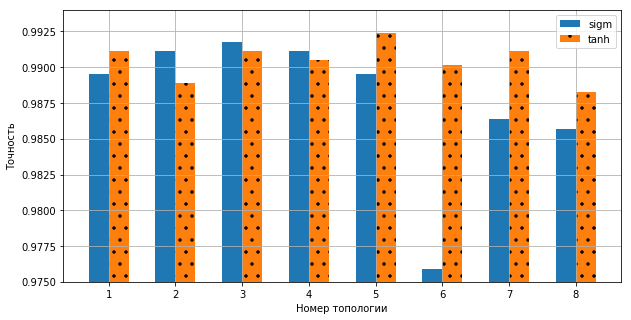

In [40]:
import numpy as np
from matplotlib import pyplot as plt

width = 0.3

x = np.array(list(range(1, len(max_accuraces_sigm_models)+1)))

max_s_acc = np.array(max_accuraces_sigm_models)
max_t_acc = np.array(max_accuraces_tanh_models)

plt.figure(figsize=(10, 5))
plt.bar(x-width/2, max_s_acc, width=width, label="sigm")
plt.bar(x+width/2, max_t_acc,  hatch=".", width=width, label="tanh")
plt.ylim(0.975, 0.994)
plt.legend()
plt.grid()
plt.xlabel("Номер топологии")
plt.ylabel("Точность")

plt.savefig("Точность_номер_топологии.png", dpi=300)

In [ ]:
for train_hist_sigm, train_hist_tanh in zip(sigmoid_models_listid_models_list, tanh_models_list):
    sigm_train_acc = train_hist_sigm.history["acc"]
    sigm_valid_acc = train_hist_sigm.history["val_acc"]
    
    tanh_train_acc = train_hist_tanh.history["acc"]
    tanh_valid_acc = train_hist_tanh.history["val_acc"]
    
    sigm_fig = plt.figure(figsize=(12,
    sigm

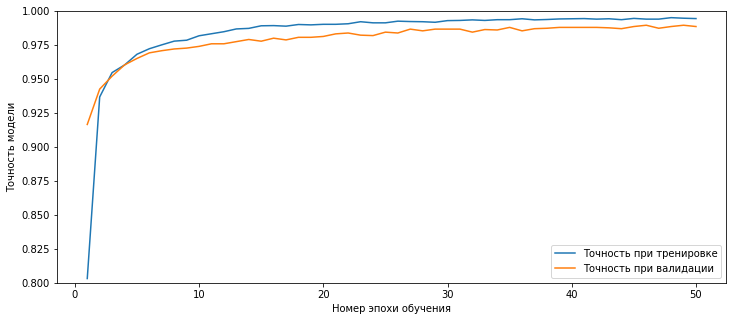

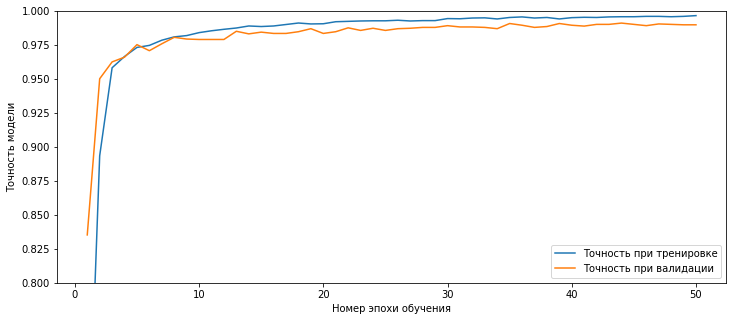

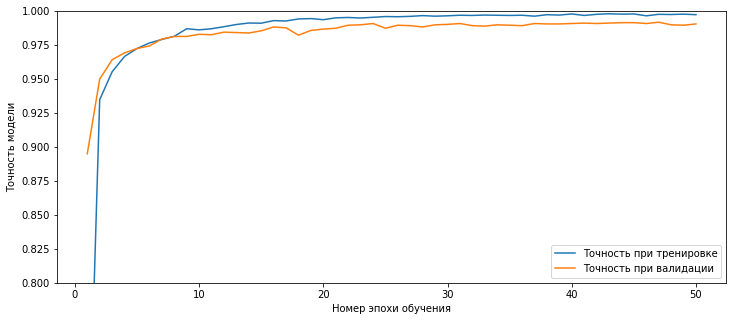

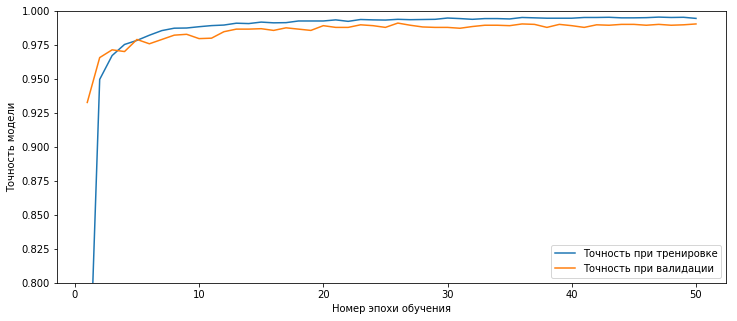

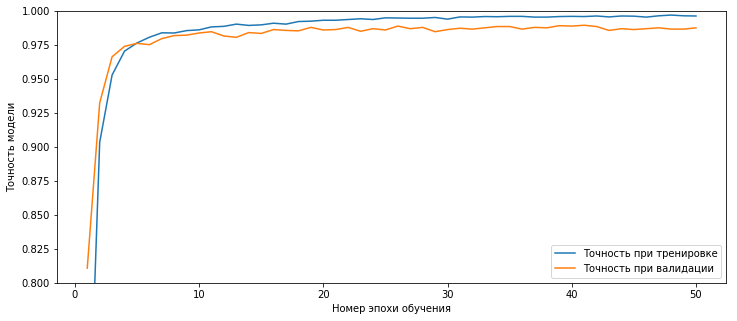

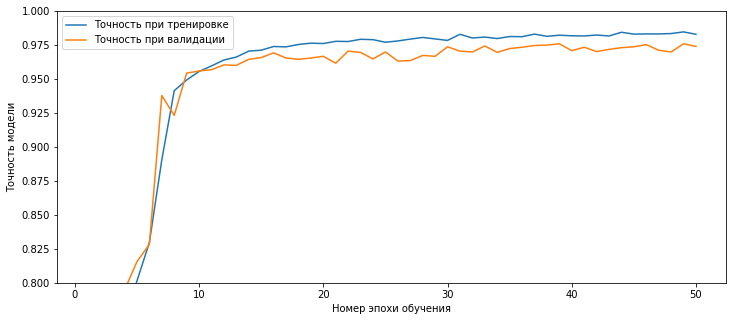

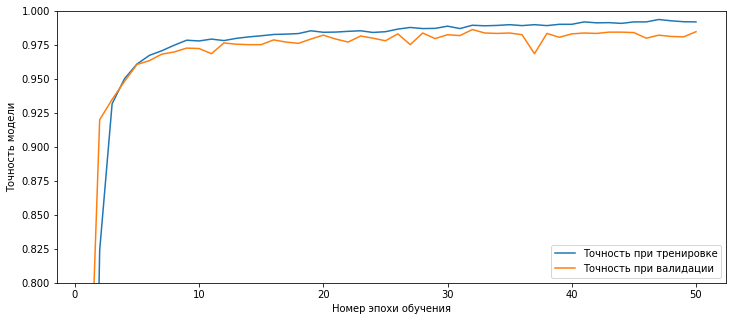

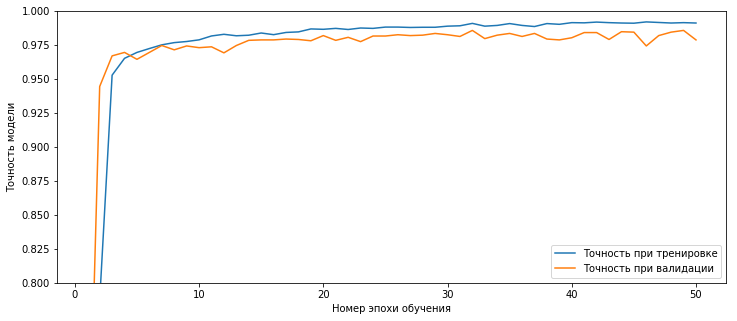

In [45]:
topology_num = 1

for history in sigmoid_models_list:
    train_acc = history.history["acc"]
    valid_acc = history.history["val_acc"]
    
    plt.figure(figsize=(12, 5))
    plt.plot(range(1, len(train_acc)+1), train_acc, label="Точность при тренировке")
    plt.plot(range(1, len(valid_acc)+1), valid_acc, label="Точность при валидации")
    plt.xlabel("Номер эпохи обучения")
    plt.ylabel("Точность модели")
    plt.legend()
    plt.ylim((0.8, 1.))
    plt.savefig("sigm_train_{}.png".format(topology_num), dpi=300)
    topology_num += 1

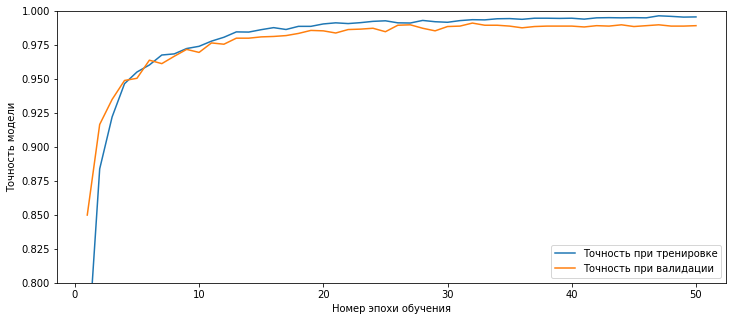

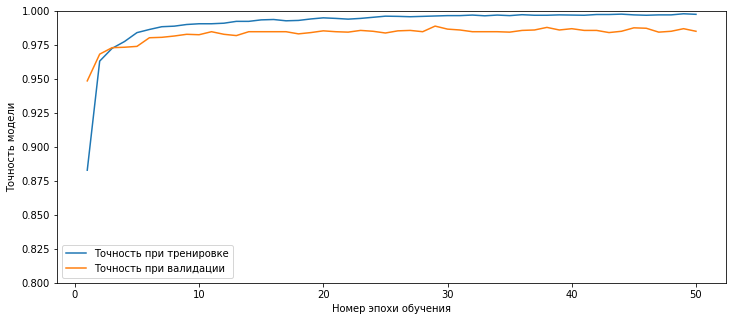

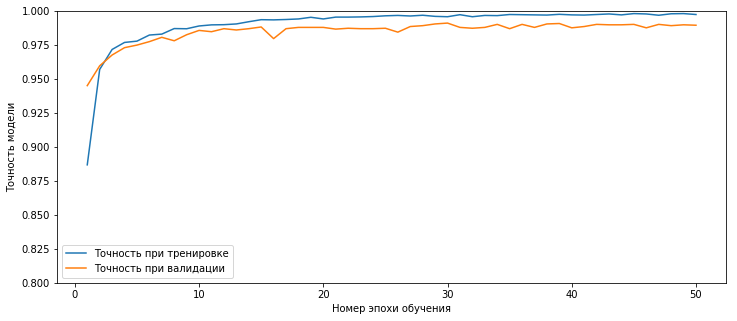

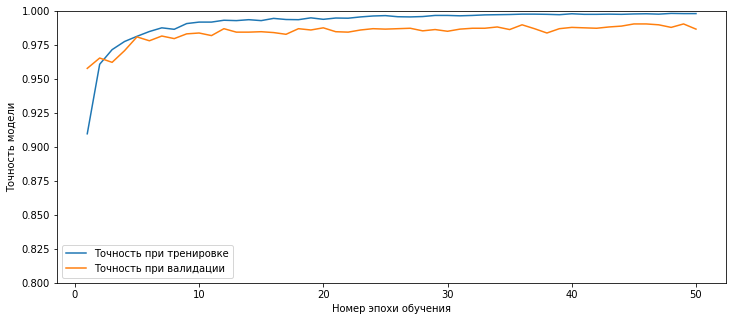

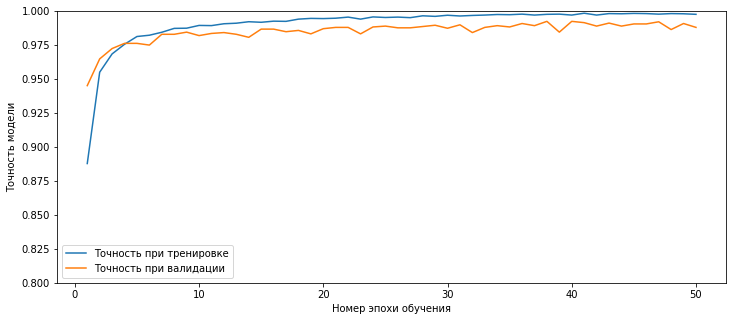

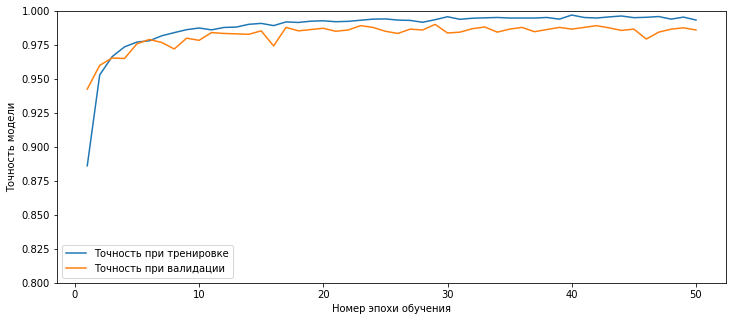

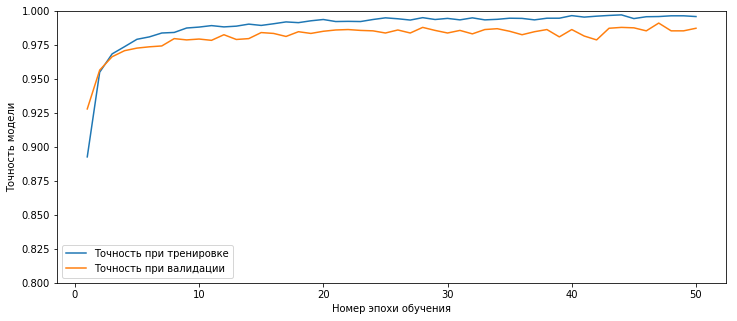

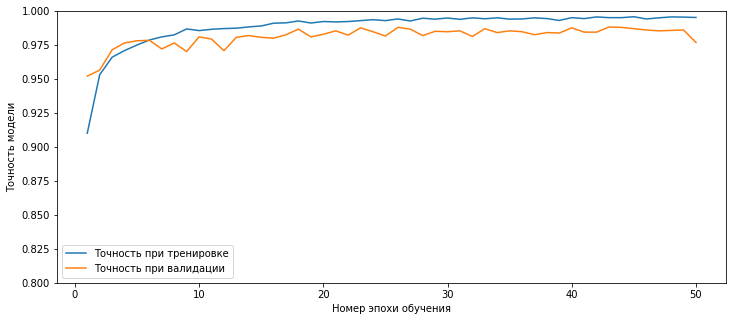

In [47]:
topology_num = 1

for history in tanh_models_list:
    train_acc = history.history["acc"]
    valid_acc = history.history["val_acc"]
    plt.figure(figsize=(12, 5))
    plt.ylim((0.8, 1.))
    plt.plot(range(1, len(train_acc)+1), train_acc, label="Точность при тренировке")
    plt.plot(range(1, len(valid_acc)+1), valid_acc, label="Точность при валидации")
    plt.xlabel("Номер эпохи обучения")
    plt.ylabel("Точность модели")
    plt.legend()
    plt.savefig("tanh_train_{}.png".format(topology_num), dpi=300)
    topology_num += 1

In [53]:
tanh_tr_acc_stds = []
tanh_val_acc_stds = []

for history in tanh_models_list:
    train_acc = history.history["acc"]
    valid_acc = history.history["val_acc"]
    tanh_tr_acc_stds.append(np.std(train_acc))
    tanh_val_acc_stds.append(np.std(valid_acc))
    
print(tanh_tr_acc_stds)
print(tanh_val_acc_stds)

[0.039274566, 0.016785508, 0.016760364, 0.013712185, 0.01676723, 0.016701601, 0.015749227, 0.013937561]
[0.02361503938289109, 0.006278124738752037, 0.00833755911912646, 0.006645191218763571, 0.007824809305920815, 0.008531126170728261, 0.00970586183715014, 0.007137490360076821]


In [60]:
sigmoid_acc_differences = []

for history in sigmoid_models_list:
    train_acc = history.history["acc"]
    valid_acc = history.history["val_acc"]
    full_diff_list = []
    for tr_acc_value, val_acc_value in zip(train_acc, valid_acc):
        diff = abs(tr_acc_value - val_acc_value)
        full_diff_list.append(diff)
    sigmoid_acc_differences.append(full_diff_list)

In [61]:
tanh_acc_differences = []

for history in tanh_models_list:
    train_acc = history.history["acc"]
    valid_acc = history.history["val_acc"]
    full_diff_list = []
    for tr_acc_value, val_acc_value in zip(train_acc, valid_acc):
        diff = abs(tr_acc_value - val_acc_value)
        full_diff_list.append(diff)
    tanh_acc_differences.append(full_diff_list)

In [71]:
sigm_diff_std = np.std(sigmoid_acc_differences, axis=1)

In [72]:
sigm_diff_std

array([0.01506612, 0.02707529, 0.03645297, 0.03497807, 0.02311946,
       0.02352456, 0.04343014, 0.04187149])

In [73]:
tang_diff_std = np.std(tanh_acc_differences, axis=1)

In [74]:
tang_diff_std

array([0.01473599, 0.00821814, 0.00756695, 0.00588106, 0.00741956,
       0.00754631, 0.00473265, 0.00570206])

In [76]:
sigm_mean_diff = np.mean(sigmoid_acc_differences, axis=1)

In [77]:
sigm_mean_diff

array([0.00892517, 0.01004444, 0.01139411, 0.01044444, 0.01076009,
       0.01482177, 0.01421043, 0.01546486])

In [79]:
tanh_mean_diff = np.mean(tanh_acc_differences, axis=1)

In [80]:
tanh_mean_diff

array([0.00762994, 0.01074196, 0.00808163, 0.00961088, 0.00839637,
       0.00827029, 0.00906032, 0.00939139])